In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu, norm, f_oneway

In [ ]:
# Load and clean the Data

df = pd.read_csv("/content/drive/MyDrive/Data_for_assignment1.csv")

# Display the first few rows to inspect the data
print(df.head())

# Clean the data by dropping any missing values
df.dropna(inplace=True) # just to be safe as a good coding practice.
print("Data shape after cleaning:", df.shape) #  Given file has all values filled

  Sample_id     Source  Chlorophyll_a  Chlorophyll_b
0       S_1  Deciduous       6.359084       3.067975
1       S_2  Deciduous       5.054568       2.257669
2       S_3  Deciduous       6.236898       1.524366
3       S_4  Deciduous       6.366217       0.782920
4       S_5  Deciduous       4.726255       1.123569
Data shape after cleaning: (100, 4)


# Histograms for Chlorophyll Distribution Separting Forests
Q1 and Q2

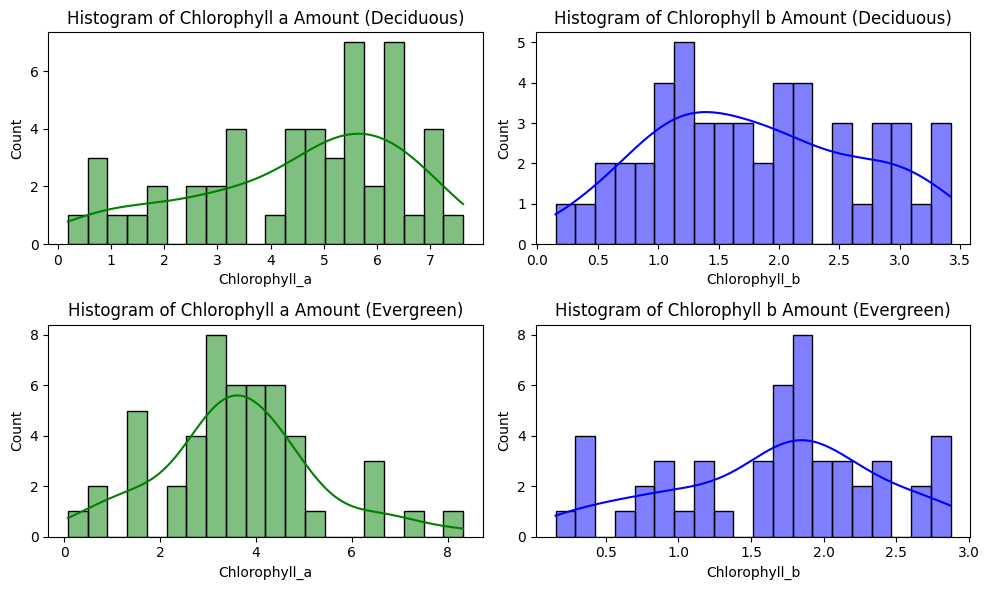

In [ ]:

# Data Subsetting
deciduous = df[df['Source'] == 'Deciduous']
evergreen = df[df['Source'] == 'Evergreen']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10,6))  # Adjust figsize as needed

# Plot histograms on the subplots
sns.histplot(deciduous['Chlorophyll_a'], kde=True, bins=20, color='green', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Chlorophyll a Amount (Deciduous)')

sns.histplot(deciduous['Chlorophyll_b'], kde=True, bins= 20, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Chlorophyll b Amount (Deciduous)')

sns.histplot(evergreen['Chlorophyll_a'], kde=True, bins=20, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Chlorophyll a Amount (Evergreen)')

sns.histplot(evergreen['Chlorophyll_b'], kde=True, bins=20, color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Chlorophyll b Amount (Evergreen)')

# Adjust layout and display
plt.subplots_adjust(hspace= 10)  # Adjust hspace to create a marked separtion
plt.tight_layout()


## Histograms  Without Separating Measurements
Q3

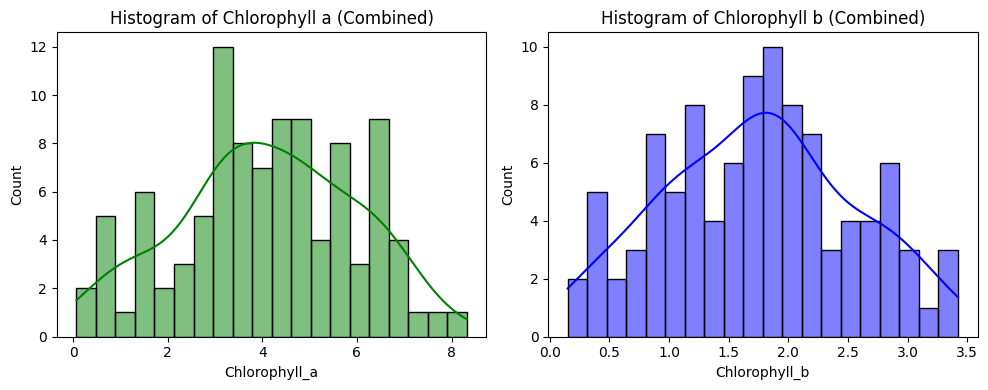

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(df['Chlorophyll_a'], kde=True, bins=20, color='green', ax=axes[0])
axes[0].set_title('Histogram of Chlorophyll a (Combined)')

sns.histplot(df['Chlorophyll_b'], kde=True, bins=20, color='blue', ax=axes[1])
axes[1].set_title('Histogram of Chlorophyll b (Combined)')

plt.tight_layout()

## Side by Side Comparision using Density Plot
Q4

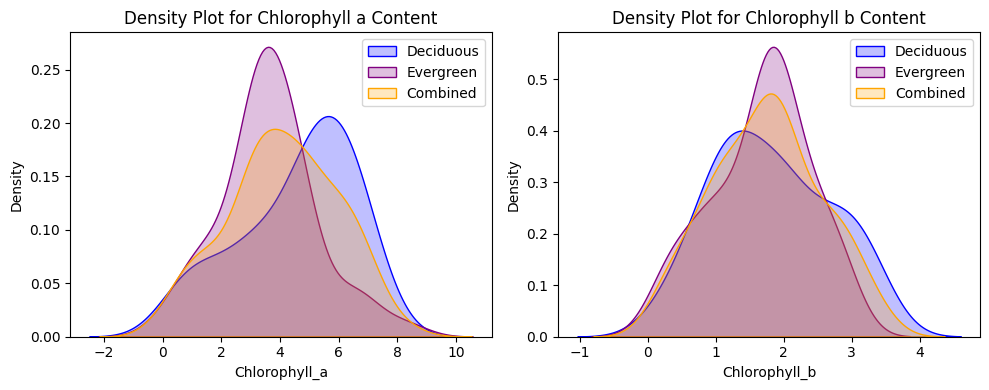

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# use df directly for the combined data

# Density plot for Chlorophyll a
sns.kdeplot(deciduous['Chlorophyll_a'], label='Deciduous', fill=True, color='blue', ax=axes[0])
sns.kdeplot(evergreen['Chlorophyll_a'], label='Evergreen', fill=True, color='purple', ax=axes[0])
sns.kdeplot(df['Chlorophyll_a'], label='Combined', fill=True, color='orange', ax=axes[0])
axes[0].set_title('Density Plot for Chlorophyll a Content')
axes[0].legend()

# Density plot for Chlorophyll b
sns.kdeplot(deciduous['Chlorophyll_b'], label='Deciduous', fill=True, color='blue', ax=axes[1])
sns.kdeplot(evergreen['Chlorophyll_b'], label='Evergreen', fill=True, color='purple', ax=axes[1])
sns.kdeplot(df['Chlorophyll_b'], label='Combined', fill=True, color='orange', ax=axes[1])
axes[1].set_title('Density Plot for Chlorophyll b Content')
axes[1].legend()

plt.tight_layout()
plt.show()

## Display Summary Statistics
Q5

In [ ]:
# create a function to display the statistics since it must be used repeatedly


def print_summary_stats(group, group_name):
    # arguments are the df to be read and the outname to be printed

    print(f"Summary Statistics for {group_name}:")

    for col in ['Chlorophyll_a', 'Chlorophyll_b']:
        mean_val = np.mean(group[col])
        median_val = np.median(group[col])
        mode_val = group[col].mode()[0]
        std_val = np.std(group[col], ddof=1)  # sample standard deviation
        print(f"{col}: Mean = {mean_val:.3f}, Median = {median_val:.3f}, Mode = {mode_val:.3f}, Std = {std_val:.3f}")
    print("\n")

# Summary statistics for Deciduous forests
print_summary_stats(deciduous, "Deciduous Forests")

# Summary statistics for Evergreen forests
print_summary_stats(evergreen, "Evergreen Forests")

# Summary statistics for Combined data
print_summary_stats(df, "Combined Data")

Summary Statistics for Deciduous Forests:
Chlorophyll_a: Mean = 4.564, Median = 4.975, Mode = 0.195, Std = 1.964
Chlorophyll_b: Mean = 1.818, Median = 1.764, Mode = 0.150, Std = 0.864


Summary Statistics for Evergreen Forests:
Chlorophyll_a: Mean = 3.626, Median = 3.531, Mode = 0.071, Std = 1.643
Chlorophyll_b: Mean = 1.666, Median = 1.781, Mode = 0.155, Std = 0.719


Summary Statistics for Combined Data:
Chlorophyll_a: Mean = 4.095, Median = 4.099, Mode = 0.071, Std = 1.862
Chlorophyll_b: Mean = 1.742, Median = 1.769, Mode = 0.150, Std = 0.794




## Boxplot Comparision
Q6

Preview of the melted dataframe used for the Boxplot
         Source Chlorophyll_Type     Value
0    Deciduous    Chlorophyll_a  6.359084
1    Deciduous    Chlorophyll_a  5.054568
2    Deciduous    Chlorophyll_a  6.236898
3    Deciduous    Chlorophyll_a  6.366217
4    Deciduous    Chlorophyll_a  4.726255
..         ...              ...       ...
195  Evergreen    Chlorophyll_b  1.618923
196  Evergreen    Chlorophyll_b  1.687520
197  Evergreen    Chlorophyll_b  2.234889
198  Evergreen    Chlorophyll_b  1.907399
199  Evergreen    Chlorophyll_b  2.282217

[200 rows x 3 columns]


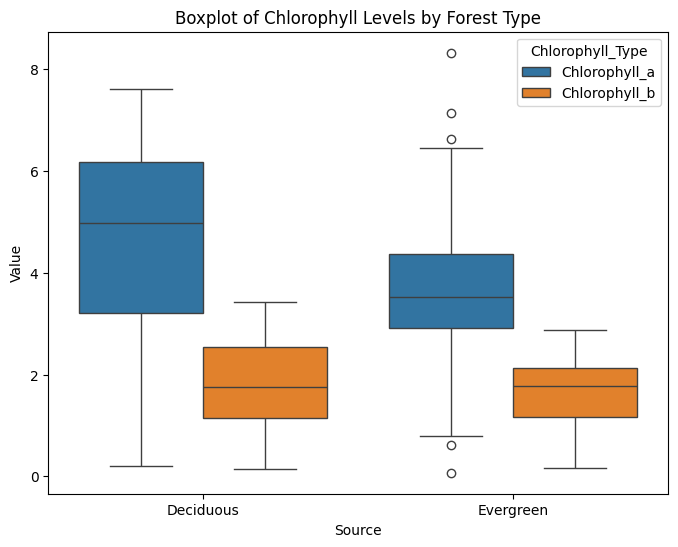

In [ ]:
# Melting the dataframe for easy boxplot comparisons
# Source is kept as the identifier column ['Chlorophyll_a', 'Chlorophyll_b'] are melted columns.
#'Chlorophyll_Type will be new column heading of the melted column'
df_melted = pd.melt(df, id_vars='Source', value_vars=['Chlorophyll_a', 'Chlorophyll_b'],
                    var_name='Chlorophyll_Type', value_name='Value')
print("Preview of the melted dataframe used for the Boxplot\n", df_melted)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Source', y='Value', hue='Chlorophyll_Type', data=df_melted)
plt.title('Boxplot of Chlorophyll Levels by Forest Type')
plt.show()

## Variance Comparison Using F Test
Q7

In [ ]:
print("F-test for comparing variances between Chlorophyll_a and Chlorophyll_b\n")

# Define a function as again, a similar process is repeated 3 times

def f_test_variances(group, group_name):
    # Calculate sample variances (using ddof=1 for sample variance)
    var_a = np.var(group['Chlorophyll_a'], ddof=1) # ddof uses n-1 in the denominator
    var_b = np.var(group['Chlorophyll_b'], ddof=1)

    # Degrees of freedom for each measurement (n - 1)
    n = len(group)
    dfn = n - 1  # numerator degrees of freedom
    dfd = n - 1  # denominator degrees of freedom

    # Determine the larger variance since F_calc >= 1
    if var_a >= var_b: # consider equality also in this for convenience
        F_calc = var_a / var_b
        larger, smaller= "Chlorophyll_a", "Chlorophyll_b"
    else:
        F_calc = var_b / var_a
        larger, smaller = "Chlorophyll_b", "Chlorophyll_a"

    # Significance level
    alpha = 0.05

    # Critical F value for the upper tail
    F_crit = stats.f.ppf(1 - alpha, dfn, dfd)

    # Calculate the cumulative probability up to F_calc | verification purposes
    cdf = stats.f.cdf(F_calc, dfn, dfd)

    # Calculate the p-value using the survival function for better precision| simple difference is rounded to 0
    p_value = stats.f.sf(F_calc, dfn, dfd)

    # Display the results
    print(f"{group_name}:")
    print(f"{larger} Variance = {round(max(var_a, var_b), 3)}")
    print(f"{smaller} Variance = {round(min(var_a, var_b), 3)}")
    print(f"Calculated F value = {round(F_calc, 3)}")
    print(f"Critical F value  = {round(F_crit, 3)}")
    print(f"p-value = {p_value:.4e}\n")

    if F_calc < F_crit:
        print(f"There is no significant difference in variance between Chlorophyll_a and Chlorophyll_b in {group_name} ( p = {p_value:.4e})).")
    else:
        print(f"There is a significant difference in variance between Chlorophyll_a and Chlorophyll_b in {group_name} (p = {p_value:.4e}).")
    print("\n")

# Perform F-test for each data grouping
f_test_variances(deciduous, "Deciduous Forests")
f_test_variances(evergreen, "Evergreen Forests")
f_test_variances(df, "Combined Data")


F-test for comparing variances between Chlorophyll_a and Chlorophyll_b

Deciduous Forests:
Chlorophyll_a Variance = 3.859
Chlorophyll_b Variance = 0.746
Calculated F value = 5.173
Critical F value  = 1.607
p-value = 2.6137e-08

There is a significant difference in variance between Chlorophyll_a and Chlorophyll_b in Deciduous Forests (p = 2.6137e-08).


Evergreen Forests:
Chlorophyll_a Variance = 2.698
Chlorophyll_b Variance = 0.517
Calculated F value = 5.222
Critical F value  = 1.607
p-value = 2.2225e-08

There is a significant difference in variance between Chlorophyll_a and Chlorophyll_b in Evergreen Forests (p = 2.2225e-08).


Combined Data:
Chlorophyll_a Variance = 3.468
Chlorophyll_b Variance = 0.631
Calculated F value = 5.498
Critical F value  = 1.394
p-value = 5.4174e-16

There is a significant difference in variance between Chlorophyll_a and Chlorophyll_b in Combined Data (p = 5.4174e-16).




## One Tailed T Test to check  if Means are Different


In [ ]:
def separate_variance_ttest(group, group_name):
    # Perform separate variance t-test (Welch's t-test)
    t_stat, p_value_two_tailed = stats.ttest_ind(
        group['Chlorophyll_a'], group['Chlorophyll_b'], equal_var=False
    )

    # Convert two-tailed p-value to one-tailed.
    if t_stat > 0:
        p_value = p_value_two_tailed / 2
    else:
        p_value = 1 - (p_value_two_tailed / 2)

    print(f"{group_name} - t-statistic: {t_stat:.3f}, one-tailed p-value: {p_value:.4e}")

    if p_value < 0.05:
        print(f"Result: Reject H0. There is significant evidence that the mean of Chlorophyll a is greater than that of Chlorophyll b in {group_name} (p = {p_value:.4e}).")
    else:
        print(f"Result: Fail to reject H0. There is no significant evidence that the mean of Chlorophyll a is greater than that of Chlorophyll b in {group_name} (p = {p_value:.4e}).")
    print("")

print("One-tailed separate variance t-test for Chlorophyll Levels:")

# Hypothesis testing for Deciduous Forests
separate_variance_ttest(deciduous, "Deciduous Forests")

# Hypothesis testing for Evergreen Forests
separate_variance_ttest(evergreen, "Evergreen Forests")

# Hypothesis testing for Combined Data
separate_variance_ttest(df, "Combined Data")

One-tailed separate variance t-test for Chlorophyll Levels:
Deciduous Forests - t-statistic: 9.050, one-tailed p-value: 1.5035e-13
Result: Reject H0. There is significant evidence that the mean of Chlorophyll a is greater than that of Chlorophyll b in Deciduous Forests (p = 1.5035e-13).

Evergreen Forests - t-statistic: 7.727, one-tailed p-value: 3.7014e-11
Result: Reject H0. There is significant evidence that the mean of Chlorophyll a is greater than that of Chlorophyll b in Evergreen Forests (p = 3.7014e-11).

Combined Data - t-statistic: 11.622, one-tailed p-value: 2.5301e-22
Result: Reject H0. There is significant evidence that the mean of Chlorophyll a is greater than that of Chlorophyll b in Combined Data (p = 2.5301e-22).

